# Cars Price - Regression

<img src="http://prod-upp-image-read.ft.com/24c17102-16a9-11ea-b869-0971bffac109" width=600px>

## Installs and Download the data

In [24]:
%%capture
!pip install shap
!gdown --id 17mCTI5MWJEldCzI5XMMdA56k-z2IK2op
!unzip /content/data.zip

## Imports

In [ ]:
import numpy as np
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Data dictionary

In [ ]:
data_dict = pd.read_excel('/content/data_dictionary.xlsx')
data_dict.head(26)

,Feature Name,Data Type,Explanation
0,Car_ID,Interger,Unique id of each observation (Interger)
1,Symboling,Categorical,"Its assigned insurance risk rating, A value of..."
2,carCompany,Categorical,Name of car company (Categorical)
3,fueltype,Categorical,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Categorical,Aspiration used in a car (Categorical)
5,doornumber,Categorical,Number of doors in a car (Categorical)
6,carbody,Categorical,body of car (Categorical)
7,drivewheel,Categorical,type of drive wheel (Categorical)
8,enginelocation,Categorical,Location of car engine (Categorical)
9,wheelbase,Numeric,Weelbase of car (Numeric)


## Dataset

In [134]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27.0,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26.0,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30.0,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22.0,17450.0


### Pre-Processing

#### Data - Cleaning

##### Droping NA Values

In [135]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = df.dropna()
df = df.drop(columns=['car_ID', 'CarName', 'fueltype', 'compressionratio', 'enginetype', 'peakrpm', 'stroke', 'carbody', 'doornumber', 'drivewheel', 'fuelsystem', 'symboling', 'boreratio', 'carlength', 'aspiration', 'carheight', 'wheelbase']) 

##### Colums Types function

In [136]:
def get_feature_type(value):
  for ind in data_dict.index:
    if data_dict['Feature Name'][ind] == value:
     return data_dict['Data Type'][ind]

##### Label Incoder - Replacing categorical values with numric values

In [137]:
labelencoder = LabelEncoder()

for col in df.columns:
  labels = tuple(df[col].unique())
  if get_feature_type(col) == 'Categorical':
    df[col] = labelencoder.fit_transform(df[col])

##### Correlation matrix - Find out how the our features effects each other 

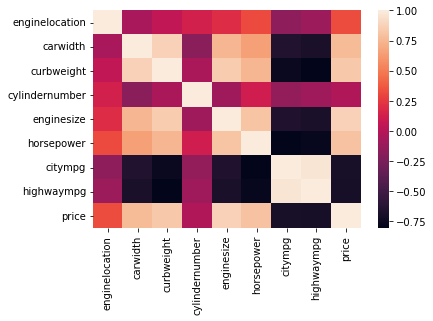

In [138]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix)

##### Data Investigation - check each column values, basic statistics 

In [139]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print(df[col].describe())
  print('\n')

enginelocation
[0 1]
count    202.000000
mean       0.014851
std        0.121259
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: enginelocation, dtype: float64


carwidth
[64.1 65.5 66.2 66.4 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6 66.3
 63.9 64.  65.2 62.5 66.  61.8 69.6 70.6 64.2 65.7 66.5 66.1 70.3 71.7
 70.5 72.  68.  64.4 65.4 68.4 68.3 65.  72.3 66.6 63.4 65.6 67.7 67.2
 68.9 68.8]
count    202.000000
mean      65.884158
std        2.124401
min       60.300000
25%       64.025000
50%       65.500000
75%       66.825000
max       72.300000
Name: carwidth, dtype: float64


curbweight
[2548 2823 2337 2824 2954 3086 3053 2395 2710 3055 3230 3380 3505 1488
 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819 1837 1940 1956
 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950 1890 1900 1905
 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515 3750 3495 3770
 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328 28

#### Data Split - without normalization

In [140]:
args_df, result_df = df.drop(columns='price'), df['price']
x_train, x_test, y_train, y_test =  train_test_split(args_df, result_df, test_size=0.33, random_state=42)

#### Data Normalization

##### Data Copy

In [141]:
from sklearn.preprocessing import StandardScaler
# copy the data
df_max_scaled = df.copy()

##### Normalize the copied data

In [142]:
df_max_scaled

,enginelocation,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,0,64.1,2548,2,130,111.0,21,27.0,13495.0
1,0,64.1,2548,2,130,111.0,21,27.0,16500.0
2,0,65.5,2823,3,152,154.0,19,26.0,16500.0
3,0,66.2,2337,2,109,102.0,24,30.0,13950.0
4,0,66.4,2824,1,136,115.0,18,22.0,17450.0
...,...,...,...,...,...,...,...,...,...
200,0,68.9,2952,2,141,114.0,23,28.0,16845.0
201,0,68.8,3049,2,141,160.0,19,25.0,19045.0
202,0,68.9,3012,3,173,134.0,18,23.0,21485.0
203,0,68.9,3217,3,145,106.0,26,27.0,22470.0


In [143]:
for col in df.columns:
  if get_feature_type(col) == 'Numeric' or get_feature_type(col) == 'Integer':
    df_max_scaled[col] = df_max_scaled[col] /df_max_scaled[col].abs().max()

#### Display 

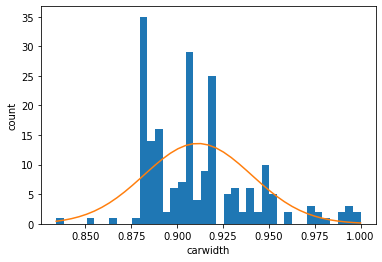

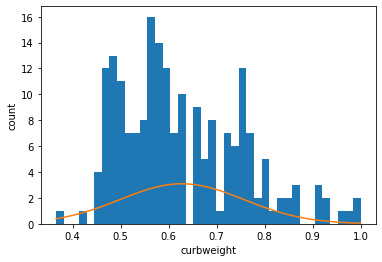

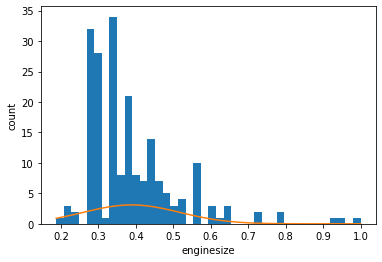

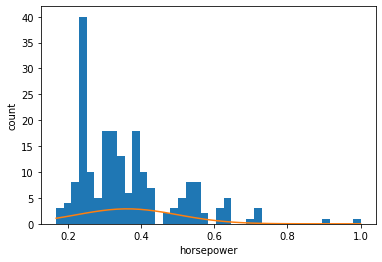

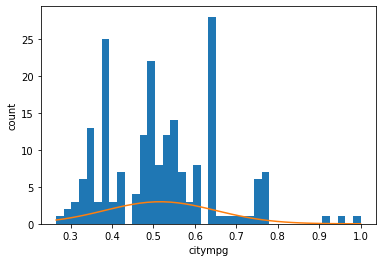

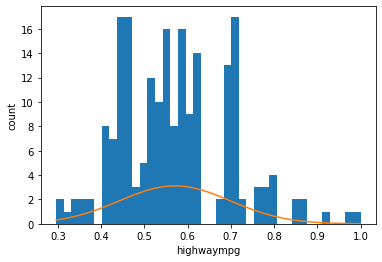

<Figure size 432x288 with 0 Axes>

In [144]:
for col in df_max_scaled.columns:
  if get_feature_type(col) in ['Numeric',' Integer']:
    params = df_max_scaled[col].describe()
    mu, sigma = params['mean'], params['std']
    count, bins, ignored = plt.hist(df_max_scaled[col], 40)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)))
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    plt.cla()
    plt.clf()

#### Spilt the after standardization

In [145]:
args_df_norm, result_df_norm = df_max_scaled.drop(columns='price'), df_max_scaled['price']
x_train_norm, x_test_norm, y_train_norm, y_test_norm =  train_test_split(args_df_norm, result_df_norm, test_size=0.33, random_state=42)

#### Display the Data table after standardization

In [146]:
display(df_max_scaled) #show the standardization

,enginelocation,carwidth,curbweight,cylindernumber,enginesize,horsepower,citympg,highwaympg,price
0,0,0.886584,0.626660,2,0.398773,0.385417,0.428571,0.500000,13495.0
1,0,0.886584,0.626660,2,0.398773,0.385417,0.428571,0.500000,16500.0
2,0,0.905947,0.694294,3,0.466258,0.534722,0.387755,0.481481,16500.0
3,0,0.915629,0.574766,2,0.334356,0.354167,0.489796,0.555556,13950.0
4,0,0.918396,0.694540,1,0.417178,0.399306,0.367347,0.407407,17450.0
...,...,...,...,...,...,...,...,...,...
200,0,0.952974,0.726021,2,0.432515,0.395833,0.469388,0.518519,16845.0
201,0,0.951591,0.749877,2,0.432515,0.555556,0.387755,0.462963,19045.0
202,0,0.952974,0.740777,3,0.530675,0.465278,0.367347,0.425926,21485.0
203,0,0.952974,0.791195,3,0.444785,0.368056,0.530612,0.500000,22470.0


#### Training Models

In [147]:

from sklearn import linear_model
from sklearn.svm import SVR

# Multiple-Linear-Regression
price = y_train
features = x_train

# # liner vectors regerssion
regr = linear_model.LinearRegression()
regr.fit(features.values,price)

# # support vectors regerssion
svr = SVR(kernel="linear", gamma="auto", C=70).fit(x_train_norm.values, y_train_norm)

# # random foresst regerssion
random_reg = RandomForestRegressor(max_depth=2, random_state=0)
random_reg.fit(features.values, price)

RandomForestRegressor(max_depth=2, random_state=0)

#### Accuracy Test R_2_Score - Linear Regression

In [148]:
y_true = y_test
y_predicted_liner_reg = regr.predict(x_test.values)
print("y_predicted_liner_reg is:")
r2_score(y_true, y_predicted_liner_reg)

y_predicted_liner_reg is:


0.8614433216669936

#### Accuracy Test R_2_Score - Support Vector Regression 

In [149]:
# support vectors regerssion
y_predicted_SVR_reg = svr.predict(x_test_norm.values)
print("y_predicted_SVR_reg is:")
r2_score(y_test_norm, y_predicted_SVR_reg)

y_predicted_SVR_reg is:


0.018868402591216138

#### Accuracy Test R_2_Score - Random Vector Regression

In [150]:
# random foresst regerssion
y_predicted_RFR_reg = random_reg.predict(x_test.values)
print("y_predicted_RFR_reg is:")
r2_score(y_true, y_predicted_RFR_reg)

y_predicted_RFR_reg is:


0.8818155120196636

### Analayzing Model Result

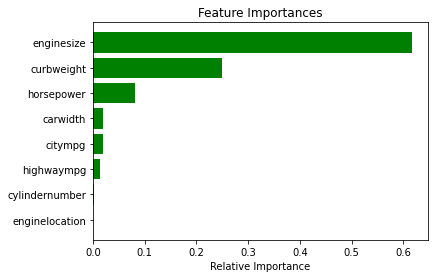

In [151]:
shap.initjs()

#Random Vector Regression 

importances = random_reg.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

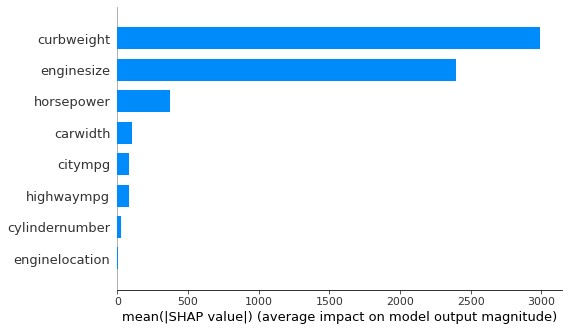

In [152]:
explainer = shap.TreeExplainer(random_reg)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names=features, plot_type="bar")

### Conclusion

##### Our opinion on the model result: 

After researching and investigating the data we have discovered that some features are'nt relevant to the model so we descieded to ignore them.
From the model we conclued that some of the features that most influenced on the results are intuitive and we expected to this result in the stage of exploring the data.

##### Which features predict the results in the best way:

1. enginesize
2. horsepower
3. enginelocation
4. curbweight

explanation:
1 & 2: this features is one of the most relevant features because its most of the time represent how strong the engine is and in the most of the times sport car/jeep/luxury car.

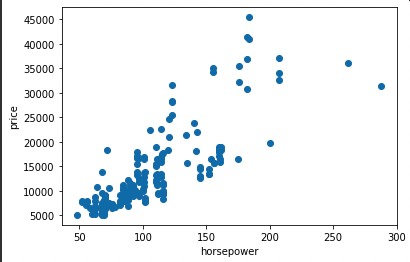

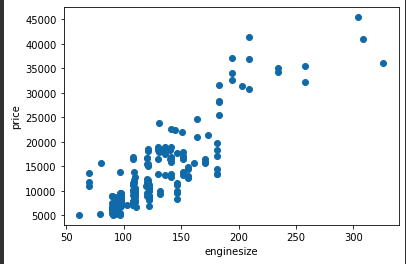

3: this feature is getting two values rear or front, in the case that the engine located at the rear is says that is expensive car, in the common case that the engine located in the front is dont say too much.  
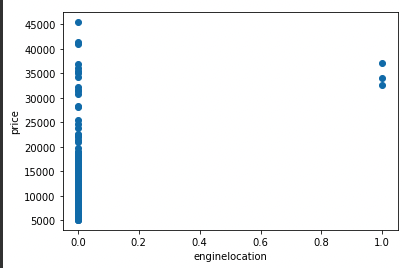

4: this feature suprised us, we didn't expected that it will influence the car price the way it did.